# Setup

In [31]:
import pandas as pd
import seaborn as sns

In [32]:
import matplotlib.transforms as transforms

In [33]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [34]:
#input args
out_dir = './out'
log_id = 1

#derived args
split_logs_dir = f'{out_dir}/split_logs/'

In [35]:
#access all 3 measurement axes
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

# State preparation

In [36]:
state_log = pd.read_csv(f'{split_logs_dir}/state_transitions.csv', index_col = 0)
state_log.head()

,Timestamp,Log Entry Type,State,Time_s
Log Entry,,,,
2,4,STATE,IDLE,0.004
9,16,STATE,IDLE,0.016
14,26,STATE,IDLE,0.026
19,36,STATE,IDLE,0.036
24,46,STATE,IDLE,0.046


In [37]:
state_log.State.unique()

array(['IDLE', 'THRUSTING', 'COASTING', 'DESCENT'], dtype=object)

In [38]:
state_transitions = state_log.loc[state_log['State'].shift(1) != state_log['State']]

In [39]:
for state_transition in state_transitions.to_dict(orient = 'rows'):
    print(state_transition)

{'Timestamp': 4, 'Log Entry Type': 'STATE', 'State': 'IDLE', 'Time_s': 0.004}
{'Timestamp': 3684, 'Log Entry Type': 'STATE', 'State': 'THRUSTING', 'Time_s': 3.6839999999999997}
{'Timestamp': 7274, 'Log Entry Type': 'STATE', 'State': 'COASTING', 'Time_s': 7.274}
{'Timestamp': 21035, 'Log Entry Type': 'STATE', 'State': 'DESCENT', 'Time_s': 21.035}


In [40]:
def plot_states(state_transitions):
    for state_transition in state_transitions.to_dict(orient = 'rows'):
        plt.axvline(state_transition['Time_s'], color='grey', linestyle='--')
        plt.text(state_transition['Time_s'], 0.1, state_transition['State'], fontsize=20, transform=plt.get_xaxis_transform(), rotation=90)

# IMU Plotting

In [41]:
imu_log = pd.read_csv(f'{split_logs_dir}/imu.csv', index_col = 0)
imu_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z
Log Entry,,,,,,,,,,,,
4,11,0.011,SENSOR,3,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
8,21,0.021,SENSOR,3,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
13,31,0.031,SENSOR,3,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
18,41,0.041,SENSOR,3,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
23,51,0.051,SENSOR,3,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#convert from wide to long format for plotting

imu_log.reset_index(inplace = True)
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acc', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
imu_log_long.head()

,,Log Entry Type,Timestamp,Time_s,Sensor Board Timestamp,Sensor Type,Sensor Board ID,Acc,Gyro,Axis
Log Entry,Axis,,,,,,,,,
4,x,SENSOR,11,0.011,0,IMU,3,0.0,0.0,x
8,x,SENSOR,21,0.021,0,IMU,3,0.0,0.0,x
13,x,SENSOR,31,0.031,0,IMU,3,0.0,0.0,x
18,x,SENSOR,41,0.041,0,IMU,3,0.0,0.0,x
23,x,SENSOR,51,0.051,0,IMU,3,0.0,0.0,x


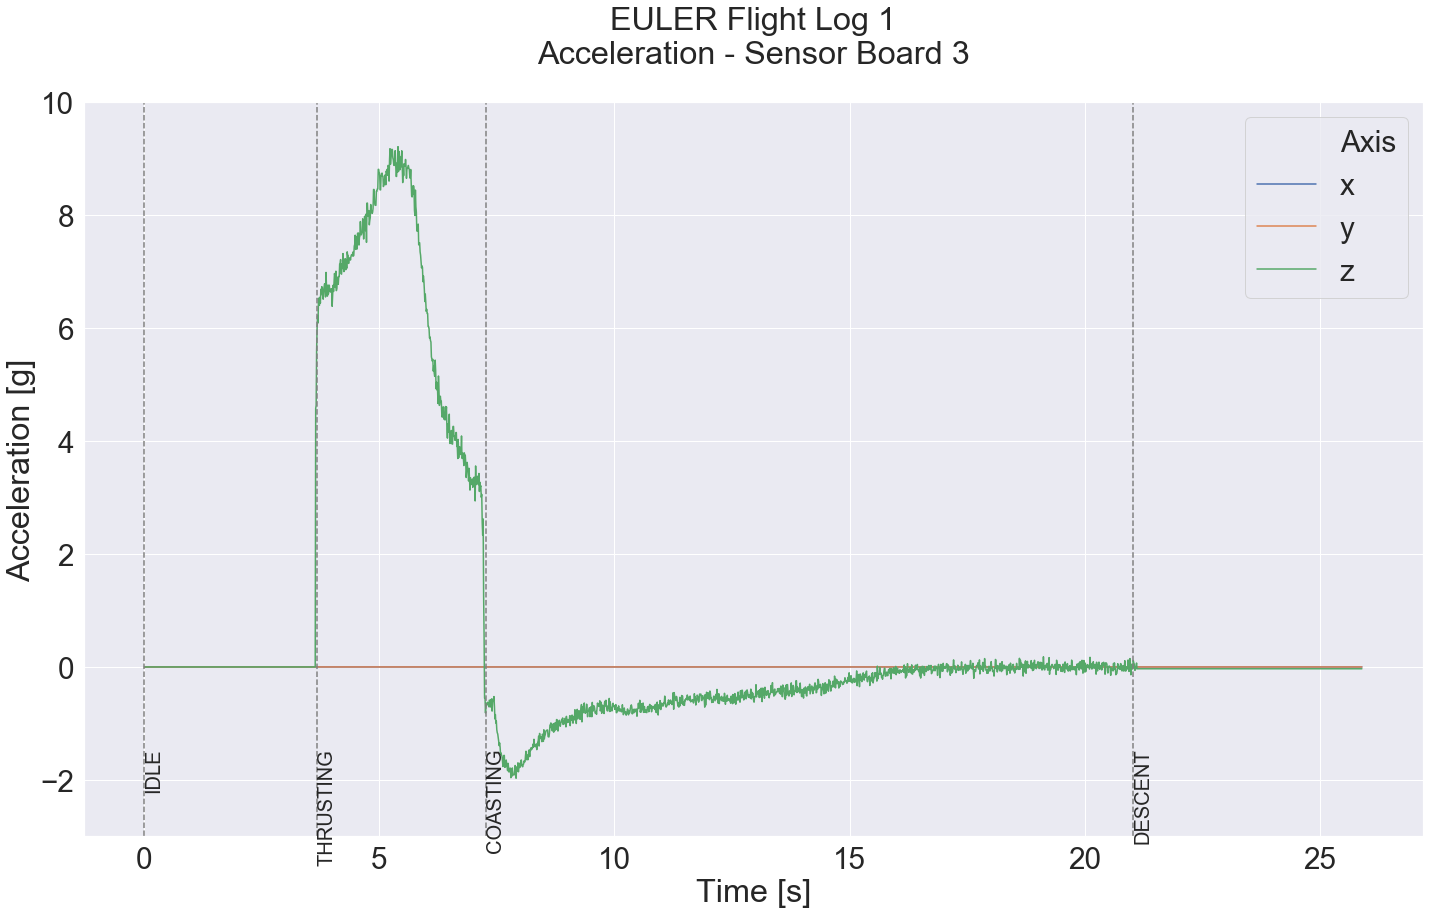

In [43]:
plt = sns.lineplot(data = imu_log_long, x = 'Time_s', y = 'Acc', hue = 'Axis')
plt.set_title(f'EULER Flight Log {log_id}\nAcceleration - Sensor Board 3\n')
plt.set_ylabel('Acceleration [g]')
plt.set_xlabel('Time [s]')
plt.set_ylim(-3, 10)
plot_states(state_transitions)

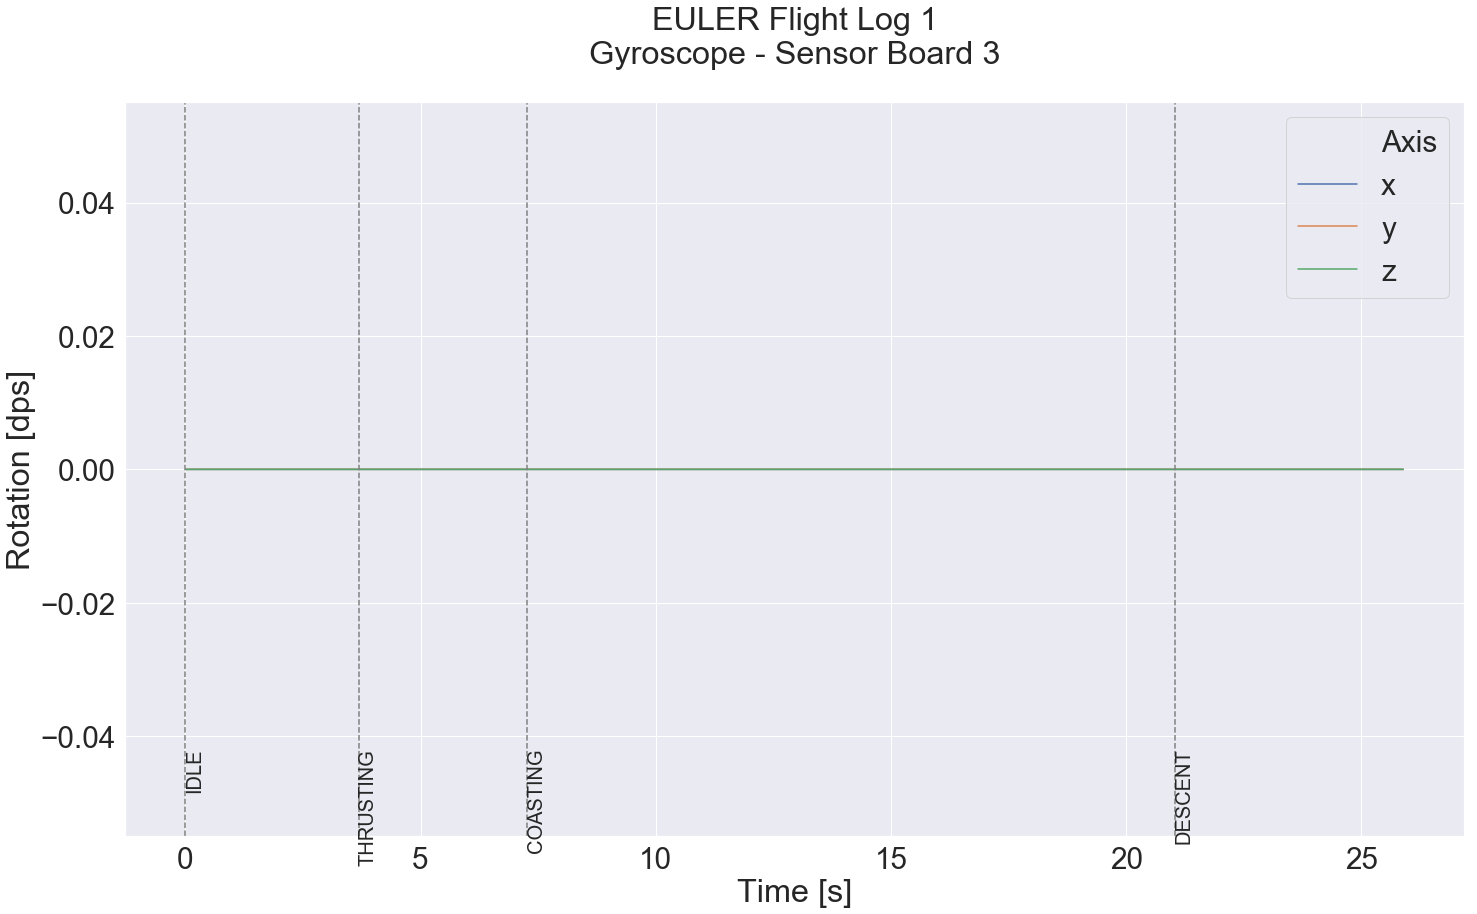

In [44]:
plt = sns.lineplot(data = imu_log_long, x = 'Time_s', y = 'Gyro', hue = 'Axis')
plt.set_title(f'EULER Flight Log {log_id}\nGyroscope - Sensor Board 3\n')
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

# Baro + Temp Plotting

In [45]:
baro_log = pd.read_csv(f'{split_logs_dir}/baro.csv', index_col = 0)
baro_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Pressure,Temperature
Log Entry,,,,,,,,
3,11,0.011,SENSOR,3,0,BARO,0,0.0
7,21,0.021,SENSOR,3,0,BARO,0,0.0
12,31,0.031,SENSOR,3,0,BARO,0,0.0
17,41,0.041,SENSOR,3,0,BARO,0,0.0
22,51,0.051,SENSOR,3,0,BARO,0,0.0


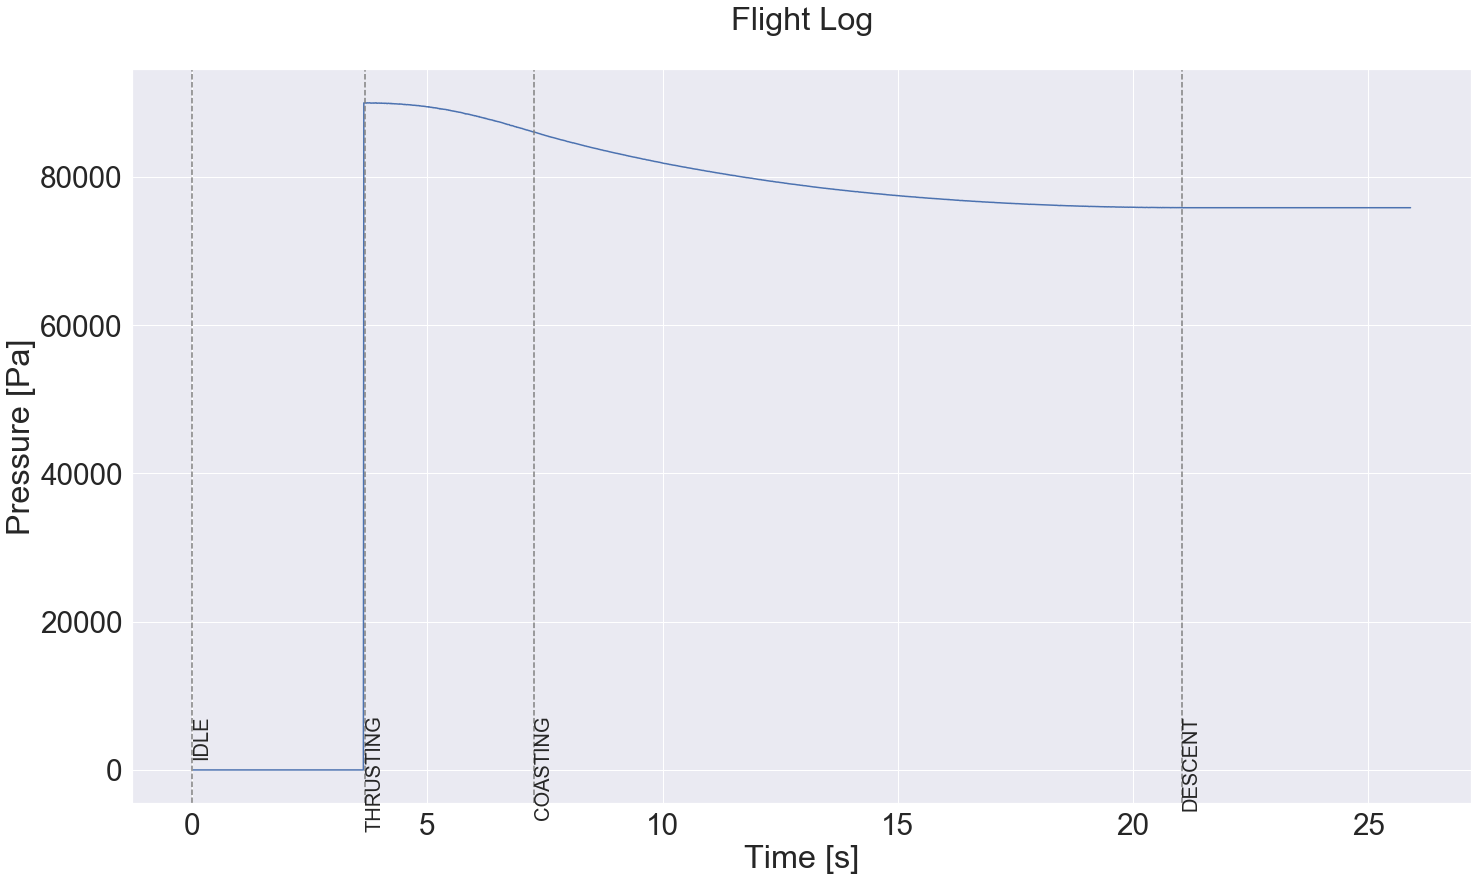

In [46]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Pressure')
plt.set_title('Flight Log\n')
#plt.set_ylim(-3300, -3100)
plt.set_ylabel('Pressure [Pa]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

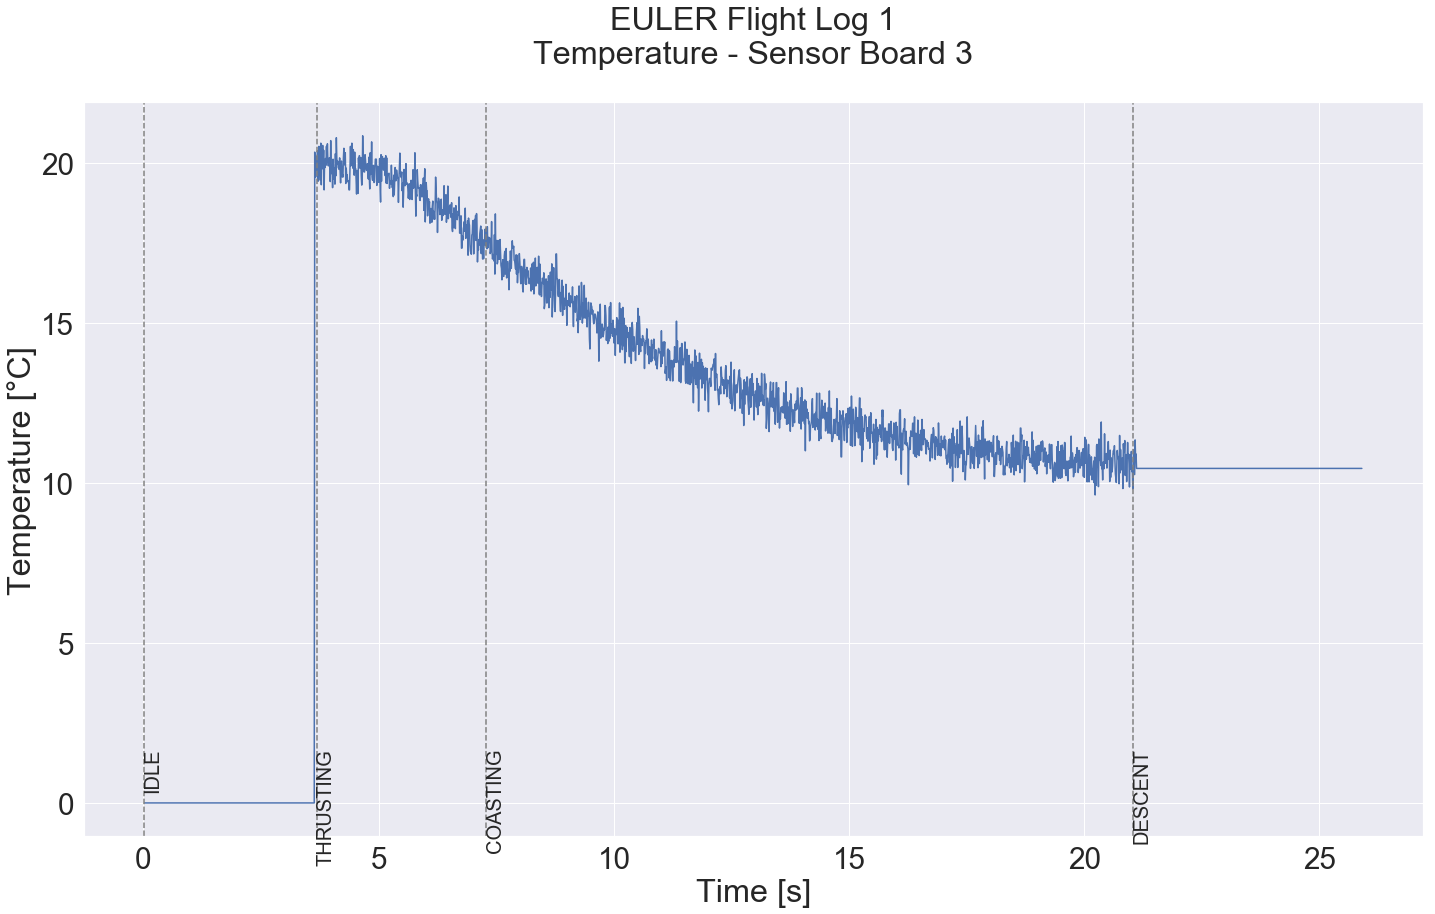

In [47]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Temperature')
plt.set_title(f'EULER Flight Log {log_id}\nTemperature - Sensor Board 3\n')
plt.set_ylabel('Temperature [\N{DEGREE SIGN}C]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)
#plt.set_ylim(-3300, -3100)
#ylabels = ['{:,.1f}'.format(y) + '\N{DEGREE SIGN}C' for y in plt.get_yticks()]
#plt.set_yticklabels(ylabels)

In [48]:
estimator_var_log = pd.read_csv(f'{split_logs_dir}/estimator_var.csv', index_col = 0)
estimator_var_log.head()

,Timestamp,Time_s,Log Entry Type,World Position (z),Rocket Velocity (z)
Log Entry,,,,,
0,1,0.001,ESTIMATOR_VAR,0.0,0.0
5,13,0.013,ESTIMATOR_VAR,0.0,0.0
10,23,0.023,ESTIMATOR_VAR,0.0,0.0
15,33,0.033,ESTIMATOR_VAR,0.0,0.0
20,43,0.043,ESTIMATOR_VAR,0.0,0.0


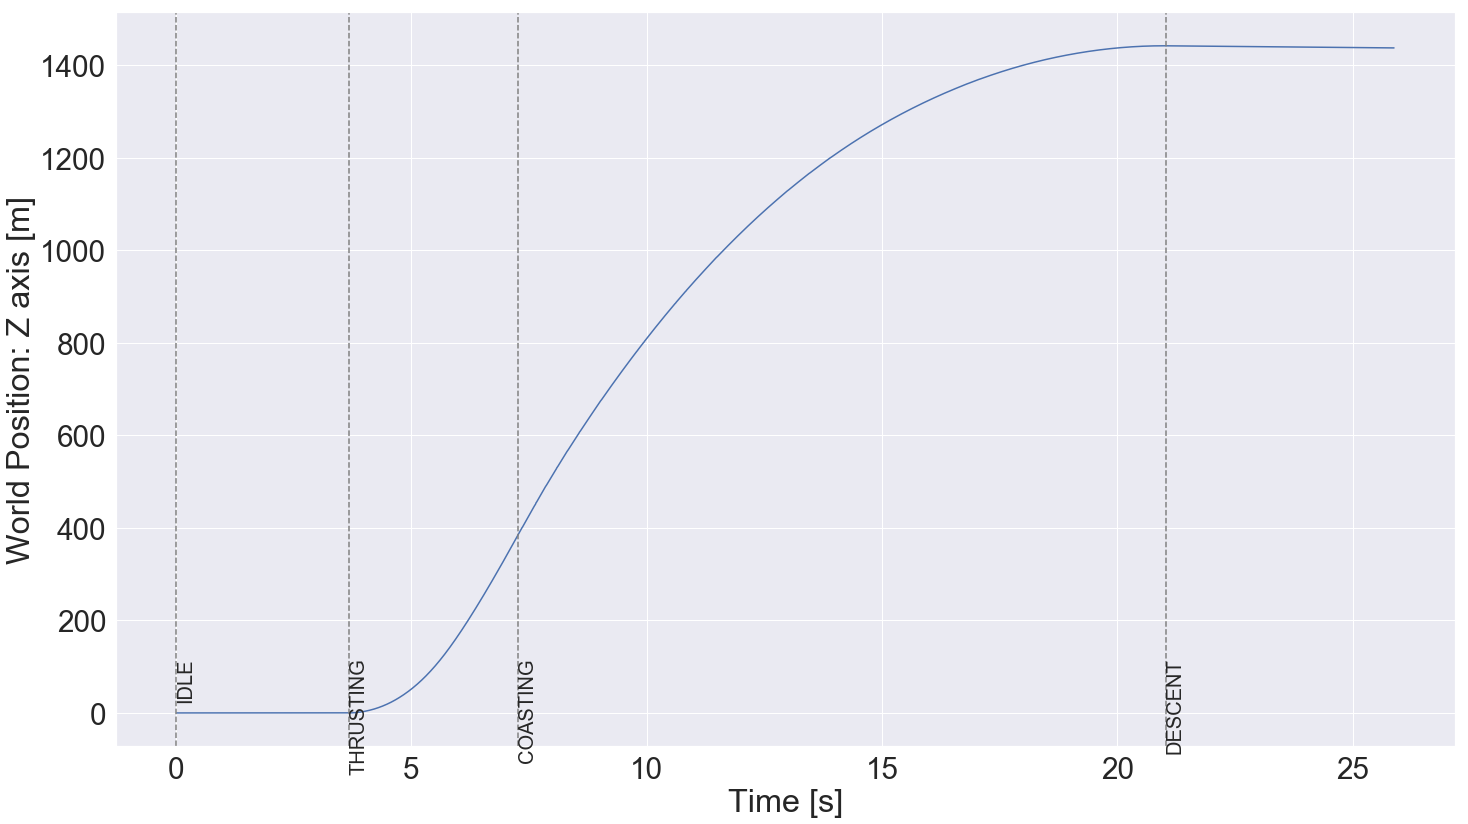

In [49]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'World Position (z)')
plt.set_ylabel('World Position: Z axis [m]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

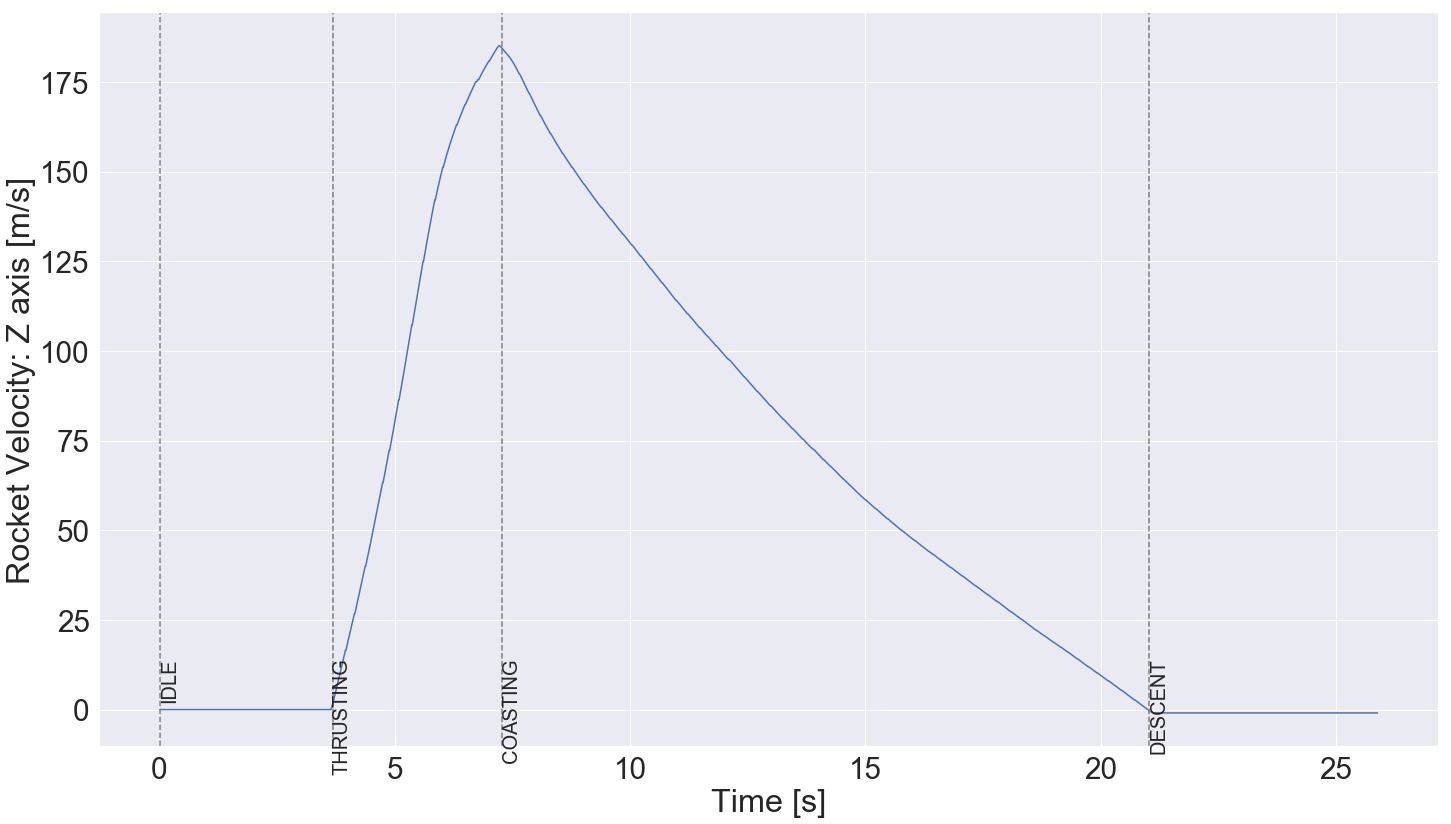

In [50]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Velocity (z)')
plt.set_ylabel('Rocket Velocity: Z axis [m/s]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [51]:
controller_out_log = pd.read_csv(f'{split_logs_dir}/controller_out.csv', index_col = 0)
controller_out_log.head()

,Timestamp,Time_s,Log Entry Type,Controller Output,Reference Error,Integrated Error
Log Entry,,,,,,
1,1,0.001,CONTROLLER_OUTPUT,0.0,0.0,0.0
6,13,0.013,CONTROLLER_OUTPUT,0.0,0.0,0.0
11,23,0.023,CONTROLLER_OUTPUT,0.0,0.0,0.0
16,33,0.033,CONTROLLER_OUTPUT,0.0,0.0,0.0
21,43,0.043,CONTROLLER_OUTPUT,0.0,0.0,0.0


In [52]:
controller_out_log['Controller Output'].unique()

array([0.   , 0.012, 0.024, 0.034, 0.043, 0.052, 0.059, 0.066, 0.073,
       0.078, 0.083, 0.088, 0.092, 0.095, 0.098, 0.101, 0.104, 0.106,
       0.107, 0.109, 0.11 , 0.105, 0.102, 0.1  , 0.096, 0.093, 0.089,
       0.085, 0.08 , 0.075, 0.07 , 0.061, 0.055, 0.049, 0.042, 0.036,
       0.029, 0.021, 0.014, 0.006, 0.001, 0.002, 0.003, 0.004, 0.005,
       0.007, 0.008, 0.009, 0.01 , 0.011, 0.013, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.023, 0.026, 0.028, 0.031, 0.032, 0.035, 0.037,
       0.038, 0.039, 0.04 , 0.041, 0.044, 0.045, 0.046, 0.047, 0.048,
       0.051, 0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.065, 0.067,
       0.068, 0.069, 0.071, 0.072, 0.074, 0.063, 0.057, 0.053, 0.05 ])

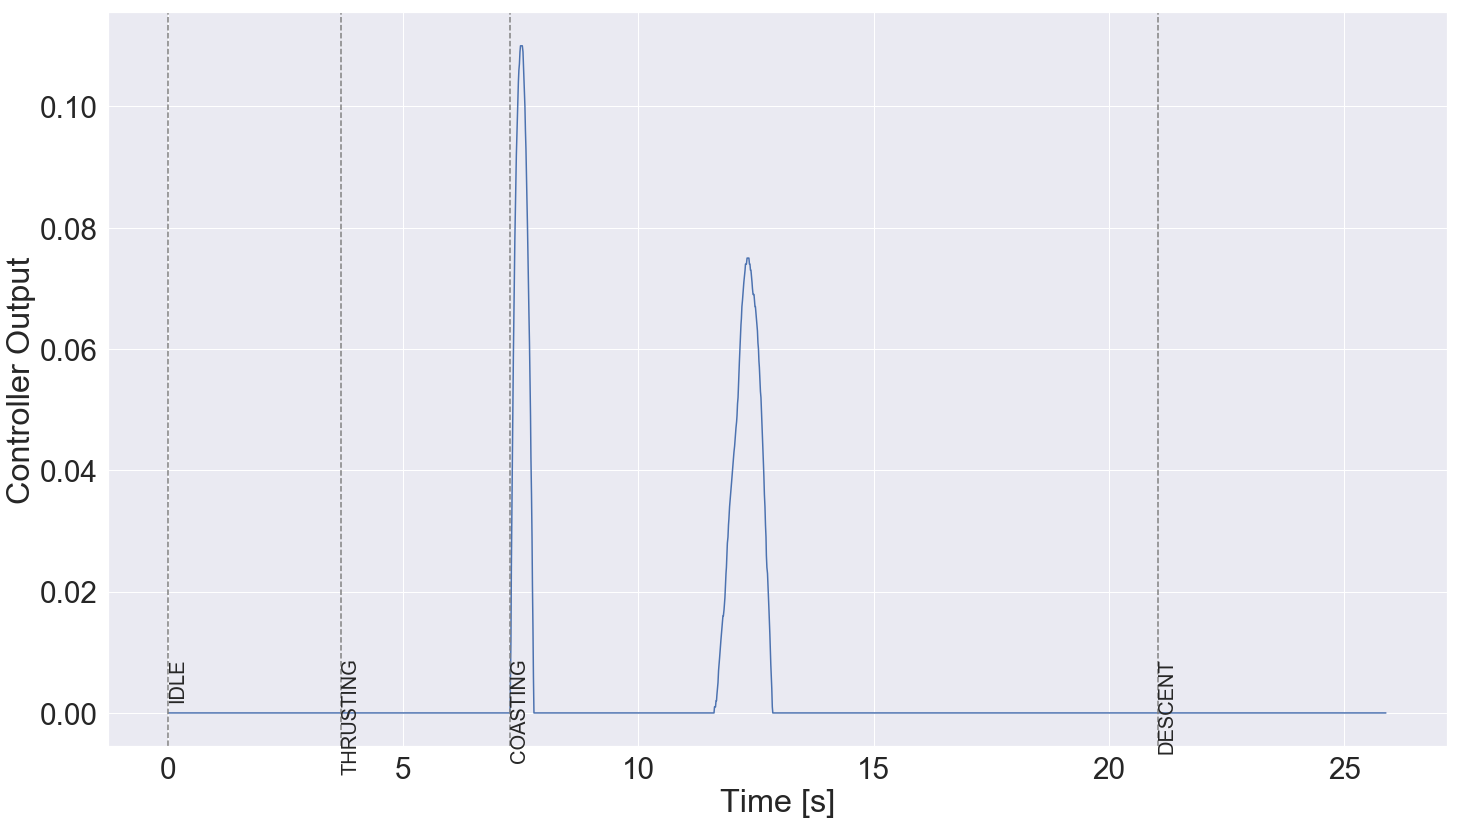

In [53]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Controller Output')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

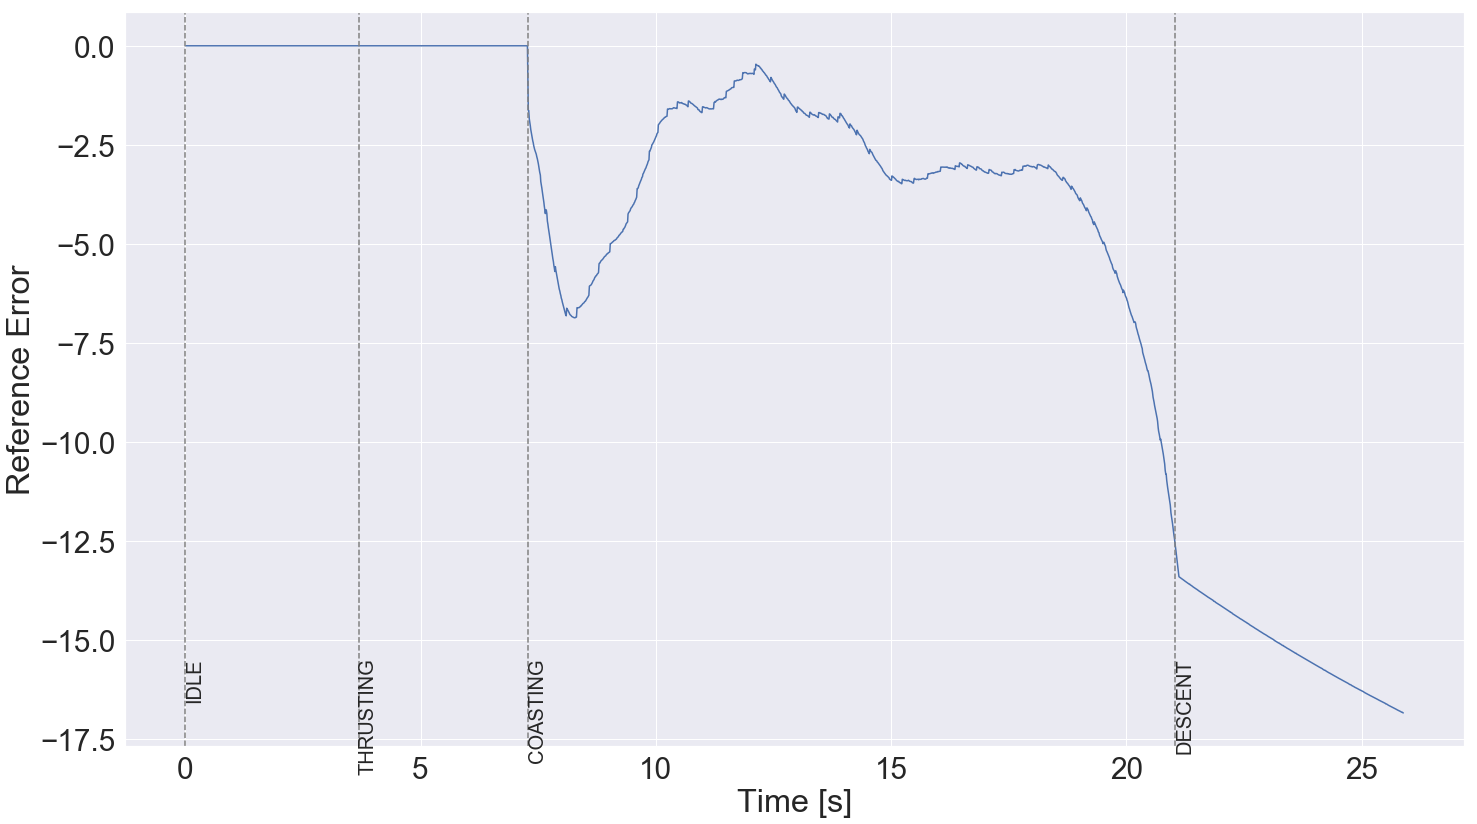

In [54]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Reference Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

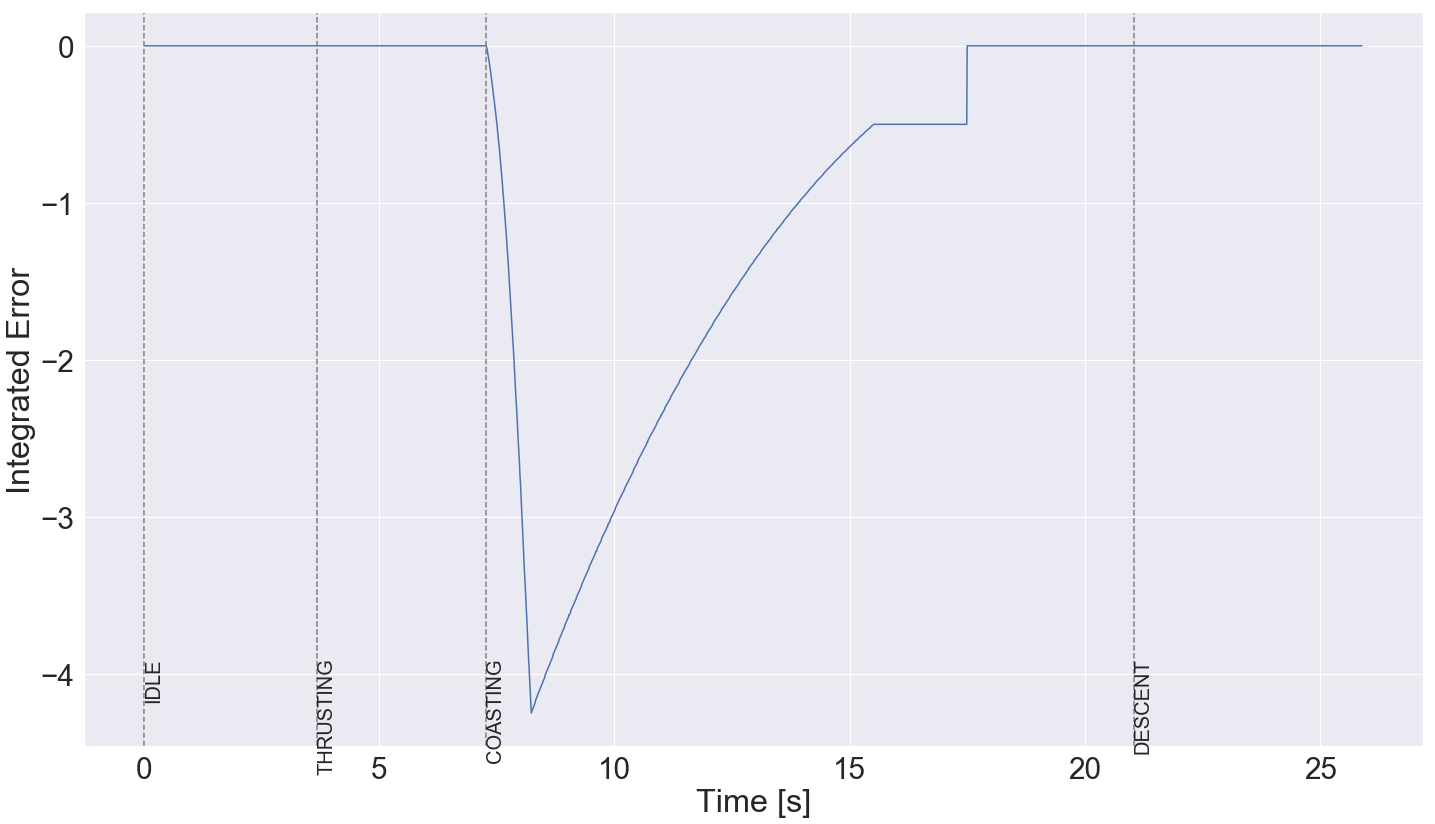

In [55]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Integrated Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)